In [1]:
import numpy
import sys
import numpy as np
import tensorflow as tf
import pickle
from tqdm import tqdm_notebook as tqm

import matplotlib.pyplot as plt

sys.path.append('..')

from linknet import LinkNetBatch
from dataset import Dataset, DatasetIndex

%matplotlib inline

In [2]:
! nvidia-smi

Tue Oct 10 17:10:49 2017       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 375.26                 Driver Version: 375.26                    |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|===============================+======================+======================|
|   0  GeForce GTX 1080    Off  | 0000:02:00.0     Off |                  N/A |
|  0%   41C    P8    14W / 200W |      0MiB /  8113MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
|   1  GeForce GTX 1080    Off  | 0000:03:00.0     Off |                  N/A |
|  0%   40C    P8    15W / 200W |   7853MiB /  8112MiB |      0%      Default |
+-------------------------------+----------------------+----------------------+
        

In [3]:
MNIST_SIZE = 10000
BATCH_SIZE = 500

In [4]:
ind = DatasetIndex(np.arange(MNIST_SIZE))
mnistset = Dataset(ind, batch_class=LinkNetBatch)
mnistset.cv_split([0.9, 0.1])

In [5]:
sess = tf.Session()
sess.run(tf.global_variables_initializer())

In [6]:
log = []
ppl = mnistset.train.pipeline()\
        .load()\
        .noise_and_mask()
        
ppl_test = mnistset.test.pipeline()\
            .load()\
            .noise_and_mask()\
            .predict_proba(sess, prediction)

In [7]:
prediction_train = []
prediction = []
ppl.train(sess, log)\
    .predict_proba(sess, prediction_train)\
    .run(BATCH_SIZE, n_epochs=1)

In [10]:
ppl_test.next_batch(int(MNIST_SIZE * 0.1))

Loss: 1.33173e+06


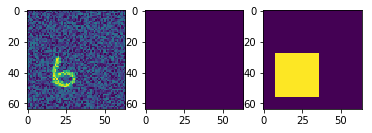

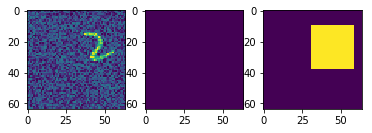

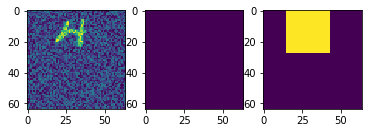

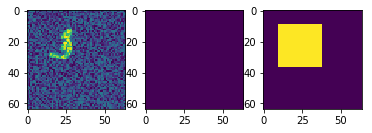

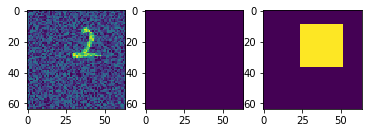

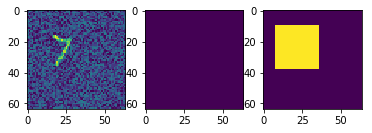

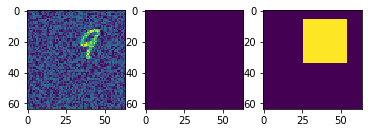

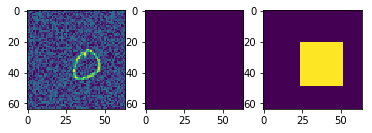

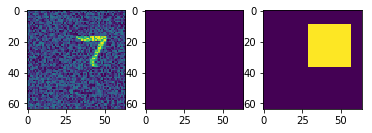

In [8]:
loss, images, masks, proba = prediction_train[-1]
print("Loss:", loss)
for i in range(9):
    plt.figure()
    plt.subplot(131)
    plt.imshow(images[i].reshape([64, 64]))
    plt.subplot(132)
    plt.imshow(proba[i][:,:,0].reshape([64, 64]))
    plt.subplot(133)
    plt.imshow(masks[i].reshape([64, 64]))
    plt.show()

In [9]:
log

[0.67524177,
 0.46109992,
 0.38939872,
 0.32166809,
 0.26974639,
 0.23423108,
 0.20574081,
 0.17729166,
 0.15562589,
 0.13763142,
 0.12405282,
 0.11095404,
 0.10041872,
 0.091554858,
 0.085838862,
 0.078488022,
 0.073164381,
 0.067828059]